<h1 style="background-color:rgba(203, 35, 23, 0.92); font-family: newtimeroman; font-size: 250%; color: white; border-radius: 80px 20px; padding: 25px; text-align: center;">
  <b>Obesity Risk Prediction</b>
</h1>

**Dataset Overview**

This notebook aims to analyze and predict obesity levels based on lifestyle, dietary habits, and personal characteristics.

**Key Features**  

- **id:** Unique identifier for each individual in the dataset.  
- **Gender:** Biological sex of the individual (Male/Female).  
- **Age:** Age of the person (years).  
- **Height:** Height of the individual (meters).  
- **Weight:** Weight of the individual (kilograms).  
- **family_history_with_overweight:** Indicates if obesity runs in the family (Yes/No).  
- **FAVC:** Frequent consumption of high-calorie food (Yes/No).  
- **FCVC:** Frequency of vegetable consumption (Scale: 1-3).  
- **NCP:** Number of main meals consumed daily.  
- **CAEC:** Frequency of food consumption between meals (Never/Sometimes/Frequently/Always).  
- **SMOKE:** Indicates if the person smokes (Yes/No).  
- **CH2O:** Daily water intake (liters).  
- **SCC:** Whether the person monitors their calorie intake (Yes/No).  
- **FAF:** Frequency of physical activity (Scale: 0-3).  
- **TUE:** Time spent using electronic devices daily (hours).  
- **CALC:** Alcohol consumption frequency (Never/Sometimes/Frequently/Always).  
- **MTRANS:** Mode of transportation (Public Transport/Walking/Automobile/Bike).  
- **NObeyesdad:** Target variable - obesity classification (Normal Weight, Overweight, Obese, etc.).  


# `01` Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/competitions/playground-series-s4e2/data)

In [2]:
train = pd.read_csv('../data/train.csv')    
test = pd.read_csv('../data/test.csv')  

In [3]:
df = train.copy()
df.shape

(20758, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
# There is No Null Values  
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20758.0,10378.500000,5992.462780,0.00,5189.250000,10378.500000,15567.750000,20757.000000
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


In [7]:
df.describe(include='object').T

,count,unique,top,freq
Gender,20758,2,Female,10422
family_history_with_overweight,20758,2,yes,17014
FAVC,20758,2,yes,18982
CAEC,20758,4,Sometimes,17529
SMOKE,20758,2,no,20513
SCC,20758,2,no,20071
CALC,20758,3,Sometimes,15066
MTRANS,20758,5,Public_Transportation,16687
NObeyesdad,20758,7,Obesity_Type_III,4046


In [8]:
# There is No Duplicates
df.duplicated().sum()    

0

In [9]:
df.nunique()    

id                                20758
Gender                                2
Age                                1703
Height                             1833
Weight                             1979
family_history_with_overweight        2
FAVC                                  2
FCVC                                934
NCP                                 689
CAEC                                  4
SMOKE                                 2
CH2O                               1506
SCC                                   2
FAF                                1360
TUE                                1297
CALC                                  3
MTRANS                                5
NObeyesdad                            7
dtype: int64

<b>This dataset appears to be imbalanced because the percentage distribution of the classes is not uniform. 
 Some categories, such as Obesity_Type_III (19.5%), have a significantly higher proportion compared to others, 
 like Overweight_Level_I (11.7%) and Overweight_Level_II (12.1%). <b>

<Axes: ylabel='count'>

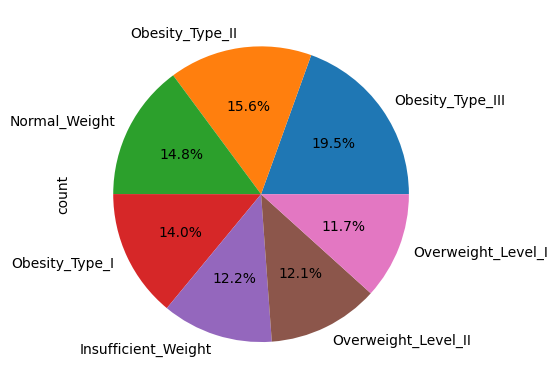

In [10]:
df["NObeyesdad"].value_counts().plot.pie(autopct='%1.1f%%')

In [13]:
px.histogram(df, x="NObeyesdad",color="Gender",barmode="group", height=500, width=1000, title="Distribution of Gender by NObeyesdad")